TRABALHO ANÁLISE DE DESEMPENHO DE SISTEMAS - PARTE 1 
               ====================================================
               

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [236]:
dados = pd.read_csv('arquivo1.txt', names = ["Tamanho"]) #Todos os dados ordenador

In [237]:
dados

,Tamanho
0,4
1,4
2,4
3,4
4,4
5,4
6,4
7,4
8,4
9,4


Média
===============

In [238]:
def media():
    i = 0
    soma = 0
    while i < len(dados):
        soma += dados["Tamanho"][i]
        i = i+1
    media = soma/(i)
    return media 
    

Variância
=========

In [239]:
def variancia():
    i = 0 
    var = 0 #variável para calcular a variância 
    med = media() #variavel para guardar a media
    while i < len(dados):
        x = (dados["Tamanho"][i] - med)**2
        var += x /(len(dados) - 1)
        i = i+1
    return var

Desvio Padrão
==============

In [240]:
def desvio_padrao():
    dp = np.sqrt(variancia())
    return dp

Coeficiente de Variabilidade
=========

In [241]:
def coeficiente_variabilidade():
    cv = (desvio_padrao()/media())
    return cv

Mediana
========

In [242]:
def mediana():
    centro = len(dados)/2
    if(len(dados) % 2 == 0):
        a = dados.iloc[int(centro)]
        b = dados.iloc[int(centro) + 1]
        mediana = int((a+b)/2)
    else:
        mediana = int(dados.iloc[int(centro) + 1])    
    return mediana

Amplitude
============

In [243]:
def amplitude():
    amp = int(dados.iloc[len(dados) - 1] - dados.iloc[0])
    return amp

Quartil
=========

In [244]:
def quartil():
    posicao = int(0.25 * len(dados))
    q1 = int(dados.iloc[posicao])
    
    q2 = mediana()
    
    posicao = int(0.75 * len(dados))
    q3 = int(dados.iloc[posicao])
    
    return q1,q2,q3

Intervalo interquartil 
=================

In [245]:
def intervalo_interquartil():
    q = quartil()
    dif = 0
    dif = q[2] - q[0]
    return dif
    

In [246]:
dados2 = pd.read_csv('Trabalho - Página1.csv') #Dados com UNIC -C para achar a moda

Moda
======

In [247]:
def moda():
    i = 0
    qnt = 0
    while i < len(dados2):
        aux = int(dados2.iloc[i]["Quantidade"])
        if(aux > qnt):
            qnt = aux
            moda = int(dados2.iloc[i]["Tamanho"])
        i = i+1
    return qnt, moda

DADOS OBTIDOS
===========

In [248]:
print('                     TABELA DOS DADOS                             ')
print('__________________________________________________________________')
print(' O valor da média é:', media())
print('__________________________________________________________________')
print(' O valor da variância é:', variancia())
print('__________________________________________________________________')
print(' O valor do desvio padrão é:', desvio_padrao())
print('__________________________________________________________________')
print(' O valor do coeficiente de variabilidade é:', coeficiente_variabilidade())
print('__________________________________________________________________')
print(' O valor da amplitude é:', amplitude())
print('__________________________________________________________________')
print(' O valor da mediana é:', mediana())
print('__________________________________________________________________')
print(' O primeiro quartil é:', quartil()[0])
print('__________________________________________________________________')
print(' O segundo quartil é:', quartil()[1])
print('__________________________________________________________________')
print(' O terceiro quartil é:', quartil()[2])
print('__________________________________________________________________')
print(' O intervalo interquartil é:', intervalo_interquartil())
print('__________________________________________________________________')
print(' O valor da moda é',moda()[1],'e ela aparece', moda()[0],'vezes')
print('__________________________________________________________________')


                     TABELA DOS DADOS                             
__________________________________________________________________
 O valor da média é: 2102.7024110374973
__________________________________________________________________
 O valor da variância é: 6541288465.141245
__________________________________________________________________
 O valor do desvio padrão é: 80878.23233195224
__________________________________________________________________
 O valor do coeficiente de variabilidade é: 38.463946161571194
__________________________________________________________________
 O valor da amplitude é: 8504940
__________________________________________________________________
 O valor da mediana é: 20
__________________________________________________________________
 O primeiro quartil é: 8
__________________________________________________________________
 O segundo quartil é: 20
__________________________________________________________________
 O terceiro quartil é: 108
_

**Fazer a comparação dos dados obtidos com os dados prontos do pandas**

In [249]:
print('=== Describe do dataframe ===')
print(dados.describe())
print('=== Moda===')
print(dados.mode())
print('=== Variancia ===')
print(dados.var())

=== Describe do dataframe ===
            Tamanho
count  2.928200e+04
mean   2.102702e+03
std    8.087823e+04
min    4.000000e+00
25%    8.000000e+00
50%    2.000000e+01
75%    1.080000e+02
max    8.504944e+06
=== Moda===
   Tamanho
0        4
=== Variancia ===
Tamanho    6.541288e+09
dtype: float64


* A partir da comparação dos dados obtidos a partir das funções feitas com os dados obtidos das funções prontas do PANDAS é possível perceber que os dados são iguais, fazendo com que as funções feitas estejam praticamente corretas

Gráfico da PDF
=============

In [250]:
def vetor_pdf():
    i = 0
    vet_pdf = []
    while i < len(dados2):
        prob = int(dados2.iloc[i]["Quantidade"])/len(dados)
        vet_pdf.append(prob)
        i = i+1
    return vet_pdf

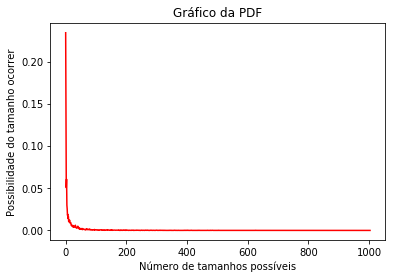

In [251]:
pdf = vetor_pdf()
plt.plot(pdf,'r-')
plt.title("Gráfico da PDF")
plt.xlabel('Número de tamanhos possíveis')
plt.ylabel('Possibilidade do tamanho ocorrer')

plt.show()

Gráfico da cdf
===============

In [252]:
def vetor_cdf():
    i = 0
    vet_cdf = []
    prob = 0
    while i < len(dados2):
        prob += int(dados2.iloc[i]["Quantidade"])/len(dados)
        vet_cdf.append(prob)
        i = i+1
    return vet_cdf

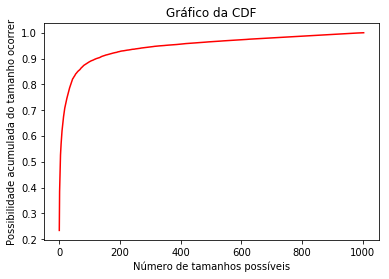

In [253]:
cdf = vetor_cdf()
plt.plot(cdf,'r-')
plt.title("Gráfico da CDF")
plt.xlabel('Número de tamanhos possíveis')
plt.ylabel('Possibilidade acumulada do tamanho ocorrer')
plt.show()

Análise de dados
==============

   Ao analisar os dados foi possível perceber que há uma grande diferença entre o tamanho dos arquivos obtidos, uma vez que a amplitude dos dados foi alta, igual a 8504940 bytes. Outro dado que pode ser visto para comprar a grande diferença no tamanho dos arquivos é a variância e o desvio padrão. Como a variância é o quadrado do desvio padrão, se os dois apresentam valores muito elevado quer dizer que há uma variação notável entre os dados.
   
   Das métricas utilizadas, a que menos descreve sobre os dados é a média. Com o valor de, aproximadamente, 2102.7 bytes, é possível perceber que é um valor relativamente alto quando comparamos com o terceiro quartil, valor que mostra até onde vão 75% dos dados, já que o 3 quartil apresenta um valor de 108 bytes. Ou seja, apenas 25% dos dados apresentam tamanho acima do terceiro quartil.
   
   Os gráficos da PDF (Probability Density Function) e da CDF (Cumulative Distribution Function) apresentam o comportamento esperado. No primeiro, quanto maior o tamanho do arquivo em bytes menor a probabilidade dele ocorrer nos dados, o que faz sentido, pois o número de arquivos pesados é menor do que o número de arquivos pequenos. No segundo, a probabilidade vai aumentando na medida em que o tamanho do arquivo aumenta, o que faz sentido,  já que as probabilidades de ocorrência dos arquivos vão sendo somadas até chegarem ao valor máximo da probabilidade (= 1).
    